In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import neural_network
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Reading data from excel
data = pd.read_excel('dset_test0123.xlsx',header=None)
#Converting dataframe to numpy array
data = np.array(data)

In [8]:
d = data[:,0:-1] #Features
l = data[:,-1]   #Label

#Creating training,validation and testing data
train_x, tdset_x, train_y, tdset_y = train_test_split(d,l,test_size=0.2)

valid_x, test_x, valid_y, test_y = train_test_split(tdset_x,tdset_y,test_size=0.5)

print(d.shape)
print(l.shape)
print(train_x.shape)
print(train_y.shape)
print(tdset_x.shape)
print(tdset_y.shape)
print(valid_x.shape)
print(valid_y.shape)
print(test_x.shape)
print(test_y.shape)


(1340, 12)
(1340,)
(1072, 12)
(1072,)
(268, 12)
(268,)
(134, 12)
(134,)
(134, 12)
(134,)


# NN

In [4]:
def nn_activation(x_train,y_train,x_test,y_test):
    error_rate = []
    activation = ['identity','logistic','tanh','relu']
    for i in activation:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,activation=i,learning_rate_init=0.001,
                                             max_iter=30000,shuffle=True)
        model.fit(x_train, y_train)
        print("Activation Function:",i)
        y_pred = model.predict(x_train)
        count=0
        for j in range(len(y_train)):
            if y_train[j] == y_pred[j]:
                count = count+1
        print("Accuracy on Training data:",(count/len(y_train)))
        y_pred = model.predict(x_test)
        count=0
        for j in range(len(y_test)):
            if y_test[j] == y_pred[j]:
                count = count+1
        error_rate.append((count/len(y_test)))
        print("Accuracy on Validation data:",(count/len(y_test)))
        
        
    kloc = error_rate.index(max(error_rate))
    print("Max accuracy is %s occurs at %s." % (error_rate[kloc], activation[kloc]))
    return activation[kloc]

In [13]:
def nn_hidden_layer(x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=i,activation='tanh',
                                             learning_rate_init=0.001,max_iter=40000,shuffle=True)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        count=0
        for j in range(len(y_test)):
            if y_test[j] == y_pred[j]:
                count = count+1
        error_rate.append((count/len(y_test)))
    kloc = error_rate.index(max(error_rate))
    print("Max accuracy is %s occurs at hidden layer size=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
    plt.title('Accuracy vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Accuracy')
    plt.show()
    return hidden_layer[kloc]

In [15]:
def nn_hidden_layer_2(x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=[30,35,40,45,50,55,60]
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(5,i),activation='tanh',
                                             learning_rate_init=0.001,max_iter=40000,shuffle=True)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        count=0
        for j in range(len(y_test)):
            if y_test[j] == y_pred[j]:
                count = count+1
        error_rate.append((count/len(y_test)))
    kloc = error_rate.index(max(error_rate))
    print("Max accuracy is %s occurs at hidden layer size=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
    plt.title('Accuracy vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Accuracy')
    plt.show()
    return hidden_layer[kloc]

In [9]:
hidden_layer = nn_activation(train_x,train_y,valid_x,valid_y)

Activation Function: identity
Accuracy on Training data: 0.6660447761194029
Accuracy on Validation data: 0.6343283582089553
Activation Function: logistic
Accuracy on Training data: 0.667910447761194
Accuracy on Validation data: 0.6268656716417911
Activation Function: tanh
Accuracy on Training data: 0.6623134328358209
Accuracy on Validation data: 0.6492537313432836
Activation Function: relu
Accuracy on Training data: 0.7210820895522388
Accuracy on Validation data: 0.6343283582089553
Max accuracy is 0.6492537313432836 occurs at tanh.


Max accuracy is 0.6940298507462687 occurs at hidden layer size=25.


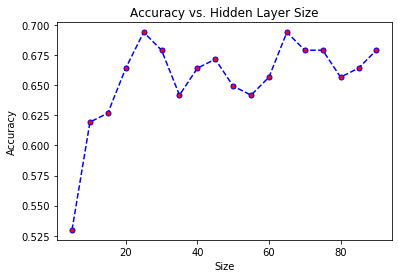

In [10]:
hidden_layer = nn_hidden_layer(train_x,train_y,valid_x,valid_y) #relu

Max accuracy is 0.6567164179104478 occurs at hidden layer size=5.


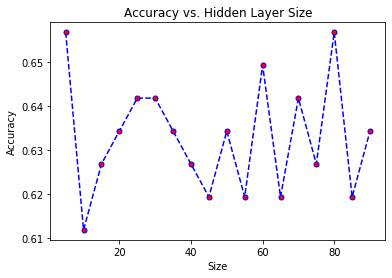

In [14]:
hidden_layer = nn_hidden_layer(train_x,train_y,valid_x,valid_y) #tanh

Max accuracy is 0.6567164179104478 occurs at hidden layer size=60.


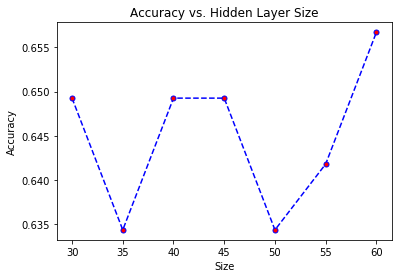

In [16]:
hidden_layer = nn_hidden_layer_2(train_x,train_y,valid_x,valid_y)

# Random Forrest

[ 97.01492537  95.98880597  97.94776119  97.20149254  98.60074627
  99.06716418  99.44029851  98.78731343  99.53358209  99.06716418
  99.53358209  99.53358209  99.81343284  99.62686567  99.72014925
 100.          99.81343284  99.90671642 100.          99.72014925
  99.90671642  99.90671642 100.         100.         100.
 100.         100.         100.          99.90671642  99.90671642
 100.         100.          99.90671642 100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.        ]
[67.91044776 67.91044776 61.94029851 69.40298507 70.89552239 61.94029851
 65.67164179 65.67164179 64.17910448 64.92537313 68.65671642 70.14925373
 64.92537313 67.1641791  68.65671642 69.40298507 67.1641791  70.14925373
 64.17910448 70.89552239 67.91044776 65.67164179 68.65671642 69.40298507
 71.64179104 67.1641791  68.65671642 68.65671642 64.92537313 70.89552239
 67.1641791  70.14925373 67.91044776 72.3880597  66.417910

Text(0, 0.5, 'Accuracy [%]')

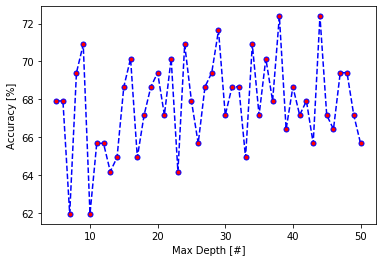

In [18]:
acc_train=[]
acc_test=[]
i=5
while i<=50:
    clf = RandomForestClassifier(n_estimators=i)
    clf = clf.fit(train_x,train_y)
    acc_train.append(clf.score(train_x,train_y)*100)
    acc_test.append(clf.score(valid_x,valid_y)*100)
    i+=1
    
print(np.array(acc_train))
print(np.array(acc_test))

plt.plot(np.arange(5,51),acc_test, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
plt.xlabel('Max Depth [#]')
plt.ylabel('Accuracy [%]')

# K Nearest Neighbour 

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100.]
[64.17910448 62.68656716 67.91044776 66.41791045 68.65671642 64.17910448
 66.41791045 66.41791045 68.65671642 68.65671642 69.40298507 67.1641791
 64.92537313 66.41791045 71.64179104 69.40298507 65.67164179 64.92537313
 64.92537313 64.92537313 63.43283582 64.92537313 62.68656716 65.67164179
 64.17910448 65.67164179 62.68656716 64.92537313 64.92537313 64.92537313
 64.17910448 63.43283582 64.17910448 64.17910448 62.68656716 64.17910448
 64.92537313 64.17910448 64.92537313 64.17910448 63.43283582 63.43283582
 63.43283582 65.67164179 63.43283582 67.1641791  66.41791045 67.91044776]


Text(0, 0.5, 'Accuracy [%]')

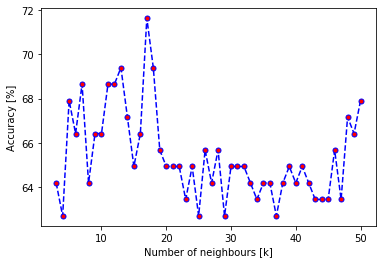

In [21]:
acc_train=[]
acc_test=[]
i=3
while i<=50:
    clf = KNeighborsClassifier(n_neighbors=i,weights='distance')
    clf = clf.fit(train_x,train_y)
    acc_train.append(clf.score(train_x,train_y)*100)
    acc_test.append(clf.score(valid_x,valid_y)*100)
    i+=1
    
print(np.array(acc_train))
print(np.array(acc_test))

plt.plot(np.arange(3,51),acc_test, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
plt.xlabel('Number of neighbours [k]')
plt.ylabel('Accuracy [%]')

# Final Models

In [20]:
def classify(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    t_0 = 0
    t_1 = 0
    f_0 = 0
    f_1 = 0
    y_pred = model.predict(x_test)
    for i in range(len(y_test)):
        if y_test[i] == 0:
            if y_test[i]==y_pred[i]:
                t_0 = t_0+1
            else:
                f_1 = f_1+1
        elif y_test[i] == 1:
            if y_test[i] == y_pred[i]:
                t_1 = t_1+1
            else:
                f_0 = f_0+1
                
    print("Confusion Matrix:")            
    print("Predicted\Actual   Not Ghost    Ghost")
    print("Not Ghost          ",t_0,"        ",f_0)
    print("Ghost              ",f_1,"        ",t_1)
    print("Accuracy:",((t_0+t_1)/len(y_test)))
    print("Error Rate:",((f_0+f_1)/len(y_test)),"\n")
    print("Prediction of Not Ghost (clear) Fingerprints")
    print("-------------------")
    print("Precision:",(t_0/(t_0+f_0)))
    print("Recall:",(t_0/(t_0+f_1)),"\n")
    print("Prediction of Ghost Fingerprints")
    print("---------------------")
    print("Precision:",(t_1/(t_1+f_1)))
    print("Recall:",(t_1/(t_1+f_0)))

In [65]:
model_nn = neural_network.MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=80,activation='relu',
                                             learning_rate_init=0.001,max_iter=40000,shuffle=True)

model_rf = RandomForestClassifier(n_estimators=25)

model_knn = KNeighborsClassifier(n_neighbors=9,weights='distance') 


In [32]:
classify(model_nn,train_x,train_y,test_x,test_y)

Confusion Matrix:
Predicted\Actual   Not Ghost    Ghost
Not Ghost           43          23
Ghost               17          51
Accuracy: 0.7014925373134329
Error Rate: 0.29850746268656714 

Prediction of Not Ghost (clear) Fingerprints
-------------------
Precision: 0.6515151515151515
Recall: 0.7166666666666667 

Prediction of Ghost Fingerprints
---------------------
Precision: 0.75
Recall: 0.6891891891891891


In [57]:
classify(model_rf,train_x,train_y,test_x,test_y)

Confusion Matrix:
Predicted\Actual   Not Ghost    Ghost
Not Ghost           43          26
Ghost               17          48
Accuracy: 0.6791044776119403
Error Rate: 0.3208955223880597 

Prediction of Not Ghost (clear) Fingerprints
-------------------
Precision: 0.6231884057971014
Recall: 0.7166666666666667 

Prediction of Ghost Fingerprints
---------------------
Precision: 0.7384615384615385
Recall: 0.6486486486486487


In [66]:
classify(model_knn,train_x,train_y,test_x,test_y)

Confusion Matrix:
Predicted\Actual   Not Ghost    Ghost
Not Ghost           31          27
Ghost               29          47
Accuracy: 0.582089552238806
Error Rate: 0.417910447761194 

Prediction of Not Ghost (clear) Fingerprints
-------------------
Precision: 0.5344827586206896
Recall: 0.5166666666666667 

Prediction of Ghost Fingerprints
---------------------
Precision: 0.618421052631579
Recall: 0.6351351351351351
